In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bbl_utils import *
from xmitgcm import open_mdsdataset 
from xhistogram.xarray import histogram

In [3]:
Γ = 0.0008613659531090722
θ = 1.53E-3
f = -0.53e-4

In [7]:
dx = 500.
delta_t = 60.

diter = 28800
iter0 = 3182400
Niter = 22
dt = 1728000
iters = np.arange(iter0, iter0 + diter*Niter, diter)

diter = 144000
iter0 = 3312000
Niter = 5
itersm = np.arange(iter0, iter0 + diter*Niter, diter)

In [8]:
data_dir = f"../../MITgcm/experiments/rotated_BBTRE_rest-tracer/run/"
ds = open_mdsdataset(data_dir,iters=iters,ignore_unknown_vars=True,prefix=["budgetDiag", "tracer01Diag", "tracer02Diag"], delta_t=60.)
dsm = open_mdsdataset(data_dir,iters=[3312000],ignore_unknown_vars=True,prefix=["standardDiag"], delta_t=60.)

/home/hdrake/.conda/envs/bblturb-analysis/lib/python3.8/site-packages/xmitgcm/mds_store.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


In [12]:
dsm['UVEL'].sel(XG=[i*2e4 for i in range(-1, 10)], method='nearest').mean(dim='time').plot(col="XG")

ValueError: Coordinates used for faceting cannot contain repeated (nonunique) values.

In [11]:
extend_multiples = [-1, 0]
xslice = [-3e5,3e5]

Lx = ds['XC'].size*dx
ds = periodic_extend(ds, ['XC', 'XG'], Lx, extend_multiples)
ds = ds.sel(XC=slice(*xslice), XG=slice(*xslice))
H = ds['Depth'].max().values.copy().astype('>f8')
ds, grid = preprocess(ds, θ)
ds['dV'] = (ds.drF * ds.rA * ds.hFacC)

In [12]:
ds = ds.chunk({'XC': 400, 'XG': 400})

In [13]:
ds['THETA_BG_C'] = Γ*ds['Zr']
ds['THETA_BG_U'] = Γ*ds['Zr_U']
ds['THETA_BG_V'] = Γ*ds['Zr_V']
ds['THETA_BG_W'] = Γ*ds['Zr_W']
ds['θ'] = ds['THETA'] + ds['THETA_BG_C']

In [14]:
mask1 = ~((((ds['θ'] <= 1.25) & (ds['XC'] <= -100e3)) | ((ds['θ'] >= 1.65) & (ds['XC'] >= 100e3))).isel(time=-1))
ds['TRAC01'] = ds['TRAC01'].where(mask1, 1.e-40)

mask2 = ~((((ds['θ'] <= 1.25) & (ds['XC'] <= -90e3)) | ((ds['θ'] >1.75))).isel(time=-1))
ds['TRAC02'] = ds['TRAC02'].where(mask2, 1.e-40)

## Exploratory data analysis

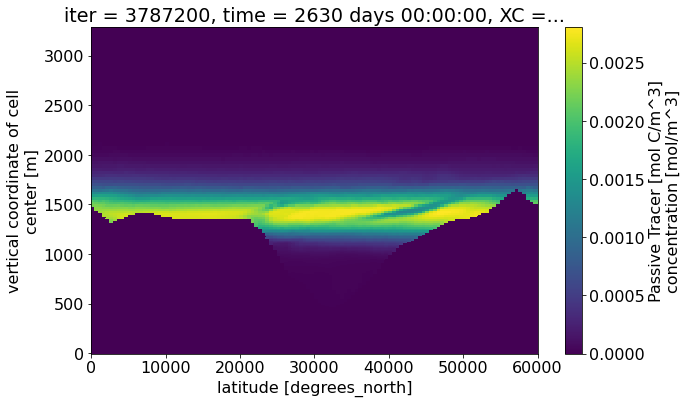

In [18]:
ds['TRAC01'].isel(time=-1).sel(XC=0, method='nearest').plot()